## 1. Correlações

Linear

In [17]:
import pandas as pd
from random import *
import numpy as np

In [18]:
lista1 = []
for i in range(5000):
  a = float(gauss(0,10))
  lista1.append(a)

In [19]:
lista2 = []
for i in range(5000):
  a = float(gauss(15,2))
  lista2.append(a)

In [20]:
np.mean(lista2)

15.011837687793019

In [21]:
np.mean(lista1)

0.12772566913079164

Testes de normalidades de Shapiro Wilk



In [22]:
from scipy.stats import shapiro
stat1, pl1 = shapiro(lista1)
if pl1 > 0.05:
  print("A hipótese nula não pode ser rejeitada (os dados são normalmente distribuídos)")
else:
  print("A hipótese nula é rejeitada (os dados não são normalmente distribuídos)")

A hipótese nula não pode ser rejeitada (os dados são normalmente distribuídos)


In [23]:
stat2, pl2 = shapiro(lista2)
if pl2 > 0.05:
  print("A hipótese nula não pode ser rejeitada (os dados são normalmente distribuídos)")
else:
  print("A hipótese nula é rejeitada (os dados não são normalmente distribuídos)")

A hipótese nula não pode ser rejeitada (os dados são normalmente distribuídos)


In [24]:
pl1, pl2

(0.8344308733940125, 0.8698232173919678)

In [25]:
from scipy.stats import pearsonr

In [26]:
r1, p3 = pearsonr(lista1, lista2)

if p3 > 0.05:
   print("A hipótese nula não pode ser rejeitada (não há relação entre as variáveis)")
else:
  print("A hipótese nula é rejeitada (há um relação entre as variáveis)")


A hipótese nula não pode ser rejeitada (não há relação entre as variáveis)


In [27]:
p3

0.4834721246406837

In [28]:
r1

-0.009912040105625457

Não Linear

In [29]:
df = pd.read_csv("atlas2010_recorte.csv", decimal = ".")

In [30]:
df

,uf,espvida,fectot,mort1,razdep,e_anosestudo
0,Rondonia,70.75,2.24,23.8,47.37,8.67
1,Rondonia,73.36,1.91,19.2,46.68,9.18
2,Rondonia,70.39,2.15,24.8,48.12,10.09
3,Rondonia,74.27,1.90,14.3,43.79,9.74
4,Rondonia,72.94,2.12,18.1,45.67,10.22
...,...,...,...,...,...,...
885,Piaui,69.57,2.67,29.2,59.93,7.94
886,Piaui,67.49,1.86,36.2,55.92,9.14
887,Piaui,66.10,2.45,41.5,55.68,8.50
888,Piaui,66.10,1.89,41.5,43.73,7.63


In [31]:
from scipy.stats import spearmanr

r2, p4 = spearmanr(df.fectot, df.mort1)

In [32]:
if p4 > 0.05:
  print("A hipótese nula não pode ser rejeitada (não há relação entre as variáveis)")
else:
  print("A hipótese nula é rejeitada (há relação entre as variáveis)")

A hipótese nula é rejeitada (há relação entre as variáveis)


In [33]:
r2

0.11017263789182423

In [34]:
covariance = np.cov(df.fectot, df.mort1)
covariance

array([[ 0.33831506,  0.39546171],
       [ 0.39546171, 44.2681119 ]])

In [35]:
cov_xy = covariance[0,1]
cov_xy

0.39546170928072205

Text(0, 0.5, 'mort1')

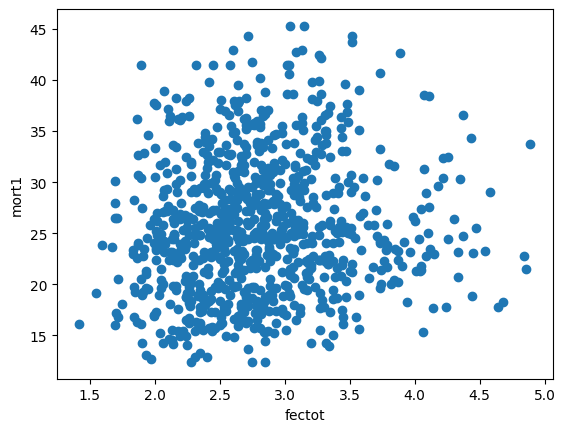

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df.fectot, df.mort1)
plt.xlabel('fectot')
plt.ylabel('mort1')

In [40]:
import statsmodels.formula.api as sn
model = sn.ols(formula='fectot ~ mort1', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 fectot   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.371
Date:                Thu, 07 Mar 2024   Prob (F-statistic):            0.00227
Time:                        02:08:53   Log-Likelihood:                -775.40
No. Observations:                 890   AIC:                             1555.
Df Residuals:                     888   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5617      0.077     33.108      0.0